<a href="https://colab.research.google.com/github/josecal2844/03MIAR_10_2024-25_Algoritmos-de-Optimizacion/blob/main/Trabajo_Pr%C3%A1ctico_Algoritmos(V2%2Cno_borrar)_Jose_Calder%C3%B3n_Lorca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmos de optimización - Trabajo Práctico<br>
Nombre y Apellidos: Jose Calderón Lorca  <br>
Url: https://colab.research.google.com/drive/1nBoApJlLQjIFaMrzgdzOvnqBRQZOTUVc?usp=sharing<br>
Google Colab: https://colab.research.google.com/drive/xxxxxxxxxxxxxxxx <br>
Problema:
>1. Sesiones de doblaje <br>
>2. Organizar los horarios de partidos de una jornada de La Liga<br>
>3. Configuración de Tribunales

Descripción del problema: Problema 2

Desde la La Liga de fútbol profesional se pretende organizar los horarios de los partidos de
liga de cada jornada. Se conocen algunos datos que nos deben llevar a diseñar un
algoritmo que realice la asignación de los partidos a los horarios de forma que maximice la
audiencia.

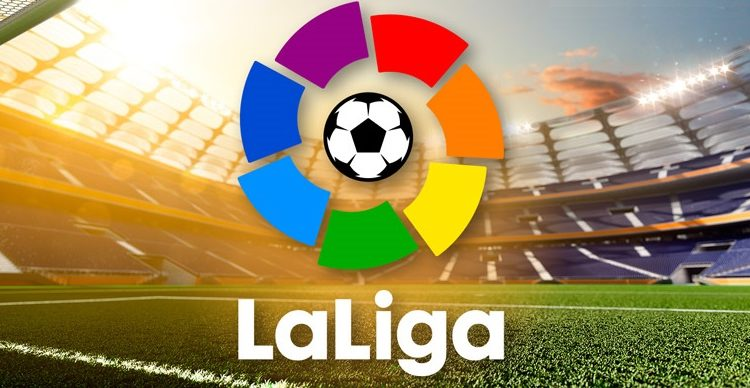                         

#Modelo
- ¿Como represento el espacio de soluciones?
- ¿Cual es la función objetivo?
- ¿Como implemento las restricciones?

### 1. Representación del espacio de soluciones

El **espacio de soluciones** de este problema consiste en todas las posibles asignaciones de los 10 partidos a los 10 horarios disponibles. Dado que cada partido puede asignarse a cualquier horario, y hay 10 partidos y 10 horarios, el número total de combinaciones posibles es de $10^{10}$ soluciones.

Esto se debe a que, para cada uno de los 10 partidos, existen 10 opciones de horarios, lo que resulta en un espacio de soluciones de tamaño $10 \times 10 \times \dots \times 10$ (10 veces), es decir, $10^{10}$. Este espacio incluye todas las configuraciones posibles, pero se reducirá considerablemente cuando se apliquen las restricciones (como la maximización de audiencia y la penalización por coincidencia de horarios).



### 2. Función objetivo

La **función objetivo** para este problema es la que maximiza los ingresos totales a partir de la audiencia ajustada de los partidos asignados a los horarios. Dado que el objetivo es maximizar la audiencia de los partidos, tenemos que tomar en cuenta tanto la audiencia base de cada partido como los coeficientes de reducción por horario y las penalizaciones por solapamiento de partidos en el mismo horario.

La función objetivo puede expresarse de la siguiente manera:

$$
\text{Ingresos Totales} = \sum_{i=1}^{n} \text{Audiencia Ajustada}(i)
$$

donde:

- $n$ es el número total de partidos (en este caso, 10 partidos).
- $\text{Audiencia Ajustada}(i)$ es la audiencia ajustada del partido $i$, que se calcula con la fórmula:

$$
\text{Audiencia Ajustada}(i) = \text{Audiencia Base}(i) \times \text{Coeficiente de Reducción del Horario}(h_i) \times (1 - \text{Penalización por Coincidencias}(c_i))
$$

Aquí:

- $\text{Audiencia Base}(i)$ es la audiencia base de cada partido $i$.
- $\text{Coeficiente de Reducción del Horario}(h_i)$ es un valor que depende del horario asignado $h_i$.
- $\text{Penalización por Coincidencias}(c_i)$ es la penalización asociada al número de partidos que coinciden en el mismo horario, $c_i$, afectando a la audiencia ajustada.

Así, la **función objetivo** se puede representar como la maximización de los ingresos totales de todos los partidos, sumando las audiencias ajustadas de cada partido tras ser asignados a los horarios correspondientes.


### 3. Restricciones

Las restricciones del problema se implementan asegurando que cada partido se asigne a un horario único y disponible. En primer lugar, se asignan los partidos con menor audiencia a los horarios más desfavorecidos (lunes y viernes), como parte de una estrategia de optimización.

Posteriormente, los demás partidos se distribuyen en los horarios restantes de manera que se maximice la audiencia ajustada, considerando el coeficiente de reducción por cada horario y la penalización por solapamiento de partidos en el mismo horario. Así, se asegura que los horarios más favorables se asignen a los partidos con mayor audiencia, mientras que se minimiza la penalización por coincidencias de horarios.

#Análisis
- ¿Que complejidad tiene el problema?. Orden de complejidad y Contabilizar el espacio de soluciones

### 4. Complejidad computacional

Si resolviéramos el problema mediante fuerza bruta, la complejidad sería **$O(n^m)$**, donde:

- **$n$** es el número de partidos.
- **$m$** el número de horarios.

Dado que el número de soluciones posibles en este problema es de **$10^{10}$**, la complejidad sigue una forma exponencial, donde el número de combinaciones posibles depende de las variables del problema. Así, se puede representar la complejidad como **$O(n^m)$** para una estimación general de la complejidad en el caso de un enfoque de fuerza bruta.


#Diseño
- ¿Que técnica utilizo? ¿Por qué?

Para abordar este problema utilizaremos un algoritmo voraz. En este caso, el objetivo es asignar partidos a horarios de manera que se maximice la audiencia total. A través de un algoritmo greedy, podemos asignar los partidos de mayor audiencia a los horarios más favorables (aquellos que no están ocupados por otros partidos o que tienen una alta audiencia potencial), lo que nos permite acercarnos a una solución eficiente sin tener que probar todas las combinaciones posibles.

El algoritmo greedy también tiene la ventaja de su baja complejidad computacional en comparación con un enfoque de fuerza bruta, ya que evita la necesidad de explorar todas las posibles asignaciones de partidos a horarios. Esto lo hace adecuado para este problema, donde la cantidad de posibles soluciones es muy grande, lo que haría que un enfoque de fuerza bruta fuera impráctico. Además, también puede ser beneficioso utilizar un algortimo determinista como este, ya que no nos interesa que para cada ejecución del programa obtengamos un calendario distinto.


In [ ]:
import pandas as pd
import numpy as np

Comenzamos definiendo una función de ganancias, con la que podremos calcular la audiencia total de una asignación de partidos concreta. En esta función implementamos las restricciones de la hora del partido y la penalización por coincidencias.

In [52]:
def ganancias(asignaciones, original_partidos, coef_reduccion, coincidencias):
    # Creo un diccionario con los partidos repetidos
    rep = np.unique(list(asignaciones.values()), return_counts = True)
    d = {}
    for i, clave in enumerate(rep[0]):
        d[clave] = rep[1][i] - 1 # Si una hora solo tiene un partido, asignamos 1 - 1 = 0 coincidencias
    valor = 0

    # Recorremos la asignación de partidos actual, y calculamos la audiencia total que tiene
    for partido, día in asignaciones.items():
        penalización = coincidencias[d[día]]
        valor += original_partidos[partido] * coef_reduccion[día] * (1 - penalización)
    return valor

En la siguiente función, llamada "distribuir", aplicamos el algoritmo greedy a nuestro problema. Para ello, recorremos todos los partidos que tenemos, y para cada partido, realizamos una asignación a cada uno de los horarios. La asignación del día y la hora que nos proporcione una mayor audiencia total será la que utilicemos para ese partido finalmente.

Como es un requisito tener un partido viernes y otro lunes, inicialmente asignaremos los dos partidos con menor audiencia a estos horarios.

Podemos resumir el flujo de trabajo como una ordenación de mayor a menor de los partidos según su audiencia base, la asignación de los dos partidos como menor audiencia a los horarios de viernes y lunes, y la posterior búsqueda del mejor horario para el partido con más audiencia base de los que quedan sin asignar (siguiendo un proceso iterativo).

In [ ]:
def distribuir(partidos, horarios, coef_reduccion, coincidencias):
    # Copia original de los partidos
    original_partidos = dict(partidos.copy())
    partidos = partidos.copy()

    # Ordenamos la lista de partidos en orden decreciente de audiencia
    partidos.sort(key = lambda x: x[1], reverse = True)

    asignaciones = {}
    audiencia = 0

    # Asignamos los dos peores partidos a lunes y viernes
    asignaciones[partidos.pop(-1)[0]] = "Viernes 20h"
    asignaciones[partidos.pop(-1)[0]] = "Lunes 20h"

    # Iniciamos valores para cada partido
    mejor_asignacion = asignaciones.copy()
    mejor_audiencia = ganancias(asignaciones, original_partidos, coef_reduccion, coincidencias)

    # Para cada partido, asignamos el mejor horario que tiene de entre todos
    for partido in partidos:

        # Recorremos todos los horarios del calendario
        for hora in horarios:
            asignaciones[partido[0]] = hora
            audiencia = ganancias(asignaciones, original_partidos, coef_reduccion, coincidencias)

            if audiencia > mejor_audiencia:
                mejor_audiencia = audiencia
                mejor_asignacion = asignaciones.copy()

        asignaciones = mejor_asignacion.copy()

    return mejor_asignacion, mejor_audiencia

Con la función "tabla", podemos crear una tabla con el calendario final de la jornada, a través de técnicas compatibles con Pandas.

In [56]:
def tabla(calendario):
    # Convertir el diccionario en un DataFrame
    df = pd.DataFrame(calendario.items(), columns=['Partido', 'Info'])
    df[['Día', 'Hora']] = df['Info'].str.split(' ', expand=True)
    df.drop(columns=['Info'], inplace=True)
    df = df.groupby(['Hora', 'Día'])['Partido'].agg(', '.join).reset_index()
    df = df.pivot(index='Hora', columns='Día', values='Partido')

    # Reordenar las columnas en el orden correcto
    dia_orden = ['Viernes', 'Sábado', 'Domingo', 'Lunes']
    df = df.reindex(columns=dia_orden)
    df = df.fillna('')  # Llenar valores NaN con cadenas vacías

    # Función para resaltar filas impares
    def highlight_odd_rows(s):
        return ['background-color: green' if i % 2 != 0 else '' for i in range(len(s))]

    # Aplicar estilos
    df_styled = df.style.apply(highlight_odd_rows, axis=0).set_table_styles(
        [{'selector': 'th, td', 'props': [('border', '1px solid black')]}]
    )
    return df_styled

# Resultados

Para resolver nuestro problema particular, comenzamos escribiendo los partidos a organizar y las restricciones del problema.

In [ ]:
# Partidos a organizar
partidos = [
    ("Celta - R.Madrid", 1.3), ("Valencia - R.Sociedad", 1.3),
    ("Mallorca - Eibar", 0.47), ("Athletic - Barcelona", 1.3),
    ("Leganés - Osasuna", 0.47), ("Villarreal - Granada", 0.75),
    ("Alavés - Levante", 0.9), ("Espanyol - Sevilla", 0.9),
    ("Betis - Valladolid", 0.75), ("Atlético - Getafe", 0.9)
]

# Horarios disponibles
horarios = ["Viernes 20h", "Sábado 12h", "Sábado 16h", "Sábado 18h", "Sábado 20h",
            "Domingo 12h", "Domingo 16h", "Domingo 18h", "Domingo 20h", "Lunes 20h"]

# Coeficiente de reducción de audiencia según el horario
coef_reduccion = {
    "Viernes 20h": 0.4, "Sábado 12h": 0.55, "Sábado 16h": 0.7, "Sábado 18h": 0.8, "Sábado 20h": 1,
    "Domingo 12h": 0.45, "Domingo 16h": 0.75, "Domingo 18h": 0.85, "Domingo 20h": 1, "Lunes 20h": 0.4
}

# Penalización por coincidencias
coincidencias = {
    0: 0, 1: 0.25, 2: 0.45, 3: 0.6, 4: 0.7,
    5: 0.75, 6: 0.78, 7: 0.8, 8: 0.8
}

Generamos la solución del calendario y la audiencia total.

In [53]:
calendario, audiencia_total = distribuir(partidos, horarios, coef_reduccion, coincidencias)

Creamos la tabla y mostramos los resultados finales.

In [63]:
print("CALENDARIO ÓPTIMO DE PARTIDOS")
display(tabla(calendario))
print("")
print("La audiencia que conseguiría esta distribución es de {} millones de personas.".format(round(audiencia_total, 3)))

CALENDARIO ÓPTIMO DE PARTIDOS


Día,Viernes,Sábado,Domingo,Lunes
Hora,,,,
12h,,Villarreal - Granada,Betis - Valladolid,
16h,,Atlético - Getafe,Espanyol - Sevilla,
18h,,Alavés - Levante,Athletic - Barcelona,
20h,Leganés - Osasuna,Celta - R.Madrid,Valencia - R.Sociedad,Mallorca - Eibar



La audiencia que conseguiría esta distribución es de 6.856 millones de personas.


Como vemos, la organización de los partidos tomando la mejor decisión en cada paso (greedy), es la de asignar cada partido a una hora diferente, sin coincidencias. En este caso, la audiencia total conseguida es de casi 7 millones de personas.

# Conclusiones

En este trabajo, se ha desarrollado un modelo para asignar partidos de fútbol a horarios con el objetivo de maximizar la audiencia. Se ha utilizado un algoritmo greedy, que, aunque no garantiza la solución óptima, ofrece una solución eficiente dada la gran cantidad de posibles combinaciones (alrededor de $10^{10}$).

El enfoque greedy permitió asignar partidos de manera rápida, priorizando aquellos con menor audiencia para los horarios menos atractivos, como los lunes y viernes. Aunque no se obtiene la mejor solución posible, la estrategia proporciona resultados satisfactorios de manera eficiente. Este enfoque es adecuado para problemas de asignación de recursos con grandes volúmenes de opciones y restricciones.

# Referencias

[1] Jungnickel, D., & Jungnickel, D. (2013). The greedy algorithm. Graphs, Networks and Algorithms, 135-161.